<a href="https://colab.research.google.com/github/brandnewmin/DeepLearningZeroToAll/blob/master/dacon2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
%matplotlib inline

In [2]:
import missingno as msno #결측값보이기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
pd.options.display.float_format='{:.2f}'.format

In [4]:
train = pd.read_csv('/content/drive/My Drive/data/train.csv')
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [51]:
#train[['store_id','installments','amount','holyday','days_of_week']].groupby(['store_id'],as_index=False).count()
#그다지 별로

,store_id,installments,amount,holyday,days_of_week
0,0,250,68773,68773,68773
1,1,14,40,40,40
2,2,0,16829,16829,16829
3,3,1,383,383,383
4,4,0,2082,2082,2082
...,...,...,...,...,...
419,424,0,3481,3481,3481
420,425,0,4094,4094,4094
421,426,5,1038,1038,1038
422,427,5,16,16,16


In [7]:
train.describe()

,store_id,amount,installments,days_of_week,holyday
count,1048575.00,1048575.00,3552.00,1048575.00,1048575.00
mean,197.35,122.47,3.67,3.08,0.04
std,129.14,774.56,3.27,1.98,0.20
min,0.00,-250000.00,2.00,0.00,0.00
25%,88.00,30.00,3.00,1.00,0.00
50%,186.00,65.00,3.00,3.00,0.00
75%,309.00,130.00,3.00,5.00,0.00
max,428.00,250000.00,24.00,6.00,1.00


In [8]:
for col in train.columns :
  msg = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100*(train[col].isnull().sum()/train[col].shape[0]))
  print(msg)
#installments의 NaN은 일시불을 의미하기 때문에 함부로 지우지 말 것

column :   store_id	 Percent of NaN value : 0.00%
column :       date	 Percent of NaN value : 0.00%
column :       time	 Percent of NaN value : 0.00%
column :    card_id	 Percent of NaN value : 0.00%
column :     amount	 Percent of NaN value : 0.00%
column : installments	 Percent of NaN value : 99.66%
column : days_of_week	 Percent of NaN value : 0.00%
column :    holyday	 Percent of NaN value : 0.00%


In [9]:
train[col]

0          0
1          0
2          0
3          0
4          0
          ..
1048570    1
1048571    1
1048572    1
1048573    1
1048574    1
Name: holyday, Length: 1048575, dtype: int64

In [ ]:
#store_id 별 amount 평균
#store_id unique값, sum(amount)/unique

In [10]:
train['store_id'].nunique()

424

In [11]:
train['amount'].sum()

128416642

In [12]:
print(train['amount'].sum()/train['store_id'].nunique())

302869.4386792453


store_id별 amount 합계

In [17]:
id_amount=train[['store_id','amount']].groupby(['store_id'], as_index=False).sum()
id_amount.head()

,store_id,amount
0,0,5234611
1,1,147950
2,2,1615060
3,3,62781
4,4,270312


In [18]:
id_amount['amount'].mean() #같은 값

302869.4386792453

In [25]:
id_amount[id_amount['amount'] > 302869.44]

,store_id,amount
0,0,5234611
2,2,1615060
6,6,1389983
8,8,515535
11,12,919325
...,...,...
415,420,357034
418,423,1156664
419,424,383032
420,425,305283


In [33]:
type(id_amount['amount'])

pandas.core.series.Series

In [34]:
id_amount['ylabel'] = [1 if a > 302869.44 else 0 for a in id_amount['amount']] #드디어 해냈다!!!

In [54]:
id_amount.head() #ylabel은 스토어별 평균 amount 보다 작은 값을 0, 큰 값을 1로 한다

,store_id,amount,ylabel
0,0,5234611,1
1,1,147950,0
2,2,1615060,1
3,3,62781,0
4,4,270312,0


In [40]:
id_amount['ylabel'].value_counts()

0    306
1    118
Name: ylabel, dtype: int64

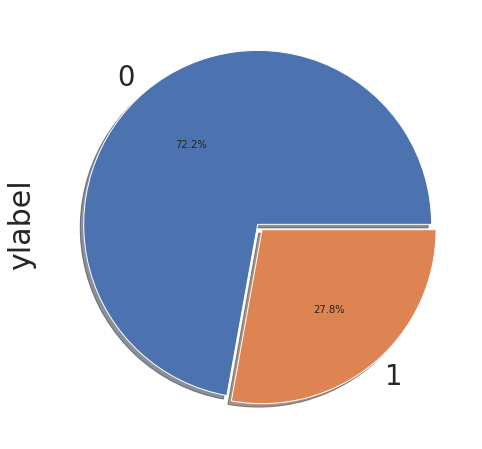

In [41]:
f, ax = plt.subplots(figsize=(10,8))
id_amount['ylabel'].value_counts().plot.pie(explode=[0,0.04], autopct='%1.1f%%', shadow=True)

In [45]:
id_amount[['amount','ylabel']].groupby(['ylabel'], as_index=True).count()

,amount
ylabel,
0,306
1,118


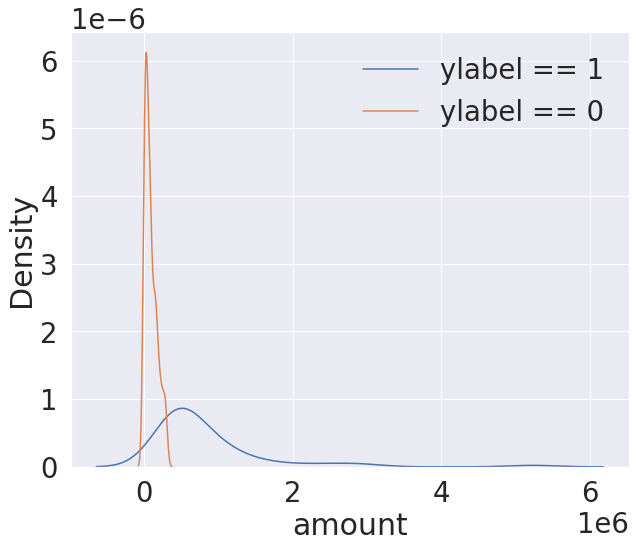

In [55]:
fig, ax = plt.subplots(figsize=(10,8))
sns.kdeplot(id_amount[id_amount['ylabel'] == 1]['amount'],ax=ax)
sns.kdeplot(id_amount[id_amount['ylabel'] == 0]['amount'],ax=ax)
plt.legend(['ylabel == 1','ylabel == 0'])
plt.show()
#너무 이상한데 비율을 조정할 필요가 있어

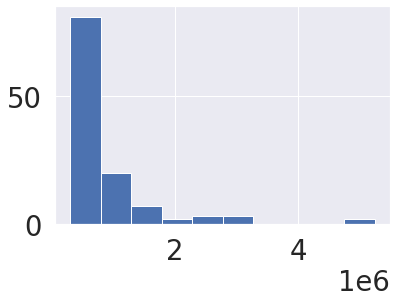

In [58]:
id_amount[id_amount['ylabel'] == 1]['amount'].hist() #축 조정하기

In [60]:
id_amount['amount']

0      5234611
1       147950
2      1615060
3        62781
4       270312
        ...   
419     383032
420     305283
421     944165
422      95850
423      41321
Name: amount, Length: 424, dtype: int64

In [63]:
one = id_amount['amount'][id_amount['ylabel'] == 1]
zero = id_amount['amount'][id_amount['ylabel'] == 0]
print(one, zero)

0      5234611
2      1615060
6      1389983
8       515535
11      919325
        ...   
415     357034
418    1156664
419     383032
420     305283
421     944165
Name: amount, Length: 118, dtype: int64 1      147950
3       62781
4      270312
5      184437
7      109510
        ...  
414    298175
416      5925
417    233079
422     95850
423     41321
Name: amount, Length: 306, dtype: int64
